![logo](/images/LogoDptMeca.png)
# Outils informatiques/méthodes numériques avancées  pour la mécanique
# cours MGC2367M
# Dpt de mécanique UCB Lyon 1

## [Documents sur le cours](/cours_html/MGC2367M)

## [Aide à la programmation avec Ollama](/cours_html/MGC2367M/#ia-generative)

## [Consignes à lire attentivement](/cours_html/MGC2367M/consignes.html)

A la fin de votre session, pensez bien à vous déconnecter (bouton en haut à gauche **se déconnecter**)

**Ecrire votre nom , prénom et numéro d'étudiant (nombre entier) ci-dessous**

In [40]:
NOM = "Moussaab"
PRENOM="Mouhalhal"
NUMERO_ETUDIANT = 12408113

# TP Manipulation de points en 2D

**vous devez écrire les fonctions dont le nom est fixé, mais dont vous devez
spécifier les arguments en fonction de la question posée.**

**Attention:** exécuter toutes les cellules depuis le début en utilisant le bouton **run**

In [41]:
%matplotlib inline
import os,sys
import numpy as np
import matplotlib.pyplot as plt
from validation.validation import check_function,liste_functions,info_function,info_etudiant
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
# test si numero étudiant spécifier
try: NUMERO_ETUDIANT
except NameError: NUMERO_ETUDIANT = None 
if type(NUMERO_ETUDIANT) is not int :
    printmd("**ERREUR:** numéro d'étudiant non spécifié!!!")
    NOM,PRENOM,NUMERO_ETUDIANT = info_etudiant()
    #raise AssertionError("NUMERO_ETUDIANT non défini")
# parametres spécifiques
_uid_    = NUMERO_ETUDIANT
_precis_ = 1.0e-5
printmd("**Login étudiant {} {} uid={}**".format(NOM,PRENOM,_uid_))
np.random.seed(_uid_)
Xpts = 4*np.random.rand(4)-2.
Ypts = 4*np.random.rand(4)-2.
# recharge les modules dans chaque cellule
%load_ext autoreload
%autoreload 2

**Login étudiant Moussaab Mouhalhal uid=12408113**

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Objectif

On se propose d’écrire une classe Python pour manipuler des points en 2D.

Nous allons utiliser l'éditeur de texte et l'interpréteur IPython de JupyterLab

  -  [documentation JupyterLab](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html)
 

## Classe Point en  2D

### Canvas de la classe Point

Compléter la classe de base **Point** qui dans l'espace cartésion en 2D permet de définir des points par leurs coordonnées (X,Y).  

Écrire la classe et les méthodes dans le fichier **Point.py**

Vous devez implémenter les méthodes définies dans cette classe et les valider soit dans le notebook
soit en utilisant la commande test_exo pour valider la fonction func (correspondant au text exok)

         test_exo Point.py exok func 


In [42]:
S=['exo500', 'exo501', 'exo502', 'exo503', 'exo504','exo505','exo506', 'exo507', 'exo508']
Func=['']
Exos=liste_functions(S,_uid_)
Meth=['_eq_','rayon','angle','distance','rotation','translation','polaire','distance','produit_vect']
printmd("**Fonctions à valider**")
print("nbre de fonctions= ",len(Exos))
print(Exos)
print("fonctions/methodes à écrire")
print(Meth)

**Fonctions à valider**

nbre de fonctions=  9
['exo500', 'exo501', 'exo502', 'exo503', 'exo504', 'exo505', 'exo506', 'exo507', 'exo508']
fonctions/methodes à écrire
['_eq_', 'rayon', 'angle', 'distance', 'rotation', 'translation', 'polaire', 'distance', 'produit_vect']


In [43]:
printmd("**Fonctions à valider**")
# definition des fonctions
for k in range(len(Exos)):
    print("Exercise {} fonction à écrire: {}".format(Exos[k],Meth[k]))
    info_function(Exos[k])

**Fonctions à valider**

Exercise exo500 fonction à écrire: _eq_

Ecrire une classe pour manipuler des points en 2D, à qui on fournit les coordonnees x,y pour créer un point et qui surcharge l'operateur égalité ==  (methode __eq__) pour tester si deux points sont confondus (si leur distance est inférieure à 1.e-05).
On passe le nom de la classe pour la validation
    
Exercise exo501 fonction à écrire: rayon

Ecrire une classe pour manipuler des points en 2D, à qui on fournit les coordonnees x,y pour créer un point et qui posséde une méthode rayon qui renvoie la distance du point à l'origine.
On passe le nom de la classe pour la validation
    
Exercise exo502 fonction à écrire: angle

Ecrire une classe pour manipuler des points en 2D, à qui on fournit les coordonnees x,y pour créer un point et qui posséde une méthode angle qui renvoie l'angle / a Ox en degre entre -180 et +180
On passe le nom de la classe pour la validation
    
Exercise exo503 fonction à écrire: distance

Ecrire une classe pour manipuler des

## Bibliothèque Point.py

In [44]:
%%bash
cat Point.py

import numpy as np
import matplotlib.pyplot as plt
# precision des calcul geometrique
EPS_GEO = 1.e-5
# classe Point
class Point(object):
    """création d'un point dans l'espace cartesien"""
    def __init__(self,x,y):
        ''' initialisation '''
        self.x = x
        self.y = y
        return 
    def copy(self):
        '''renvoie une copie du point'''
        return Point(self.x,self.y)
    def __str__(self):
        '''conversion chaine pour affichage'''
        return "Point:(%s,%s)"%(self.x,self.y) 
    def __eq__(self,P):
        ''' test si le point est confondu avec P a epsilon pres'''
        return distance(self,P) < EPS_GEO
    def rayon(self):
        '''calcul le rayon du point / origine'''
        return distance(self,Point(0,0))
    def angle(self):
        '''calcul angle en degré de -180 a 180'''
        return np.arctan2(self.y,self.x) * 180/np.pi
    def distance(self,P):
        '''calcul la distance au point P'''
        return distance(self,P)
    def ro

## fonction distance pour calculer la distance entre 2 points
### Vérification

In [45]:
%autoreload 2
from Point import *
A=Point(0,1)
B=Point(0,2)
print(distance(A,B))

1.0


### test de validation

In [46]:
# ne pas modifier

## fonction produit_vect pour calculer le produit scalaire de 3 points 
### Vérification

In [47]:
%autoreload 2
from Point import *
O=Point(0,0)
A=Point(1,0)
B=Point(0,1)
print(produit_vect(O,A,B))

1


### test validation

In [48]:
# ne pas modifier

## test égalité de 2 points (méthode eq )
### vérification

In [49]:
%autoreload 2
from Point import *
A=Point(0,1)
B=Point(0,1)
O=Point(0,0)
print(A==B)
print(A==O)

True
False


### test de validation

In [50]:
# ne pas modifier

## calcul du rayon d'un point / origine (methode rayon)
### vérification

In [51]:
%autoreload 2
from Point import *
A=Point(0,1)
print(A.rayon())

1.0


### test de validation

In [52]:
# ne pas modifier

## calcul de l'angle d'un point / origine (methode angle)
### vérification

In [53]:
%autoreload 2
from Point import *
A=Point(1,1)
print(A.angle())

45.0


### Test de validation

In [54]:
# ne pas modifier

## calcul de la distance du point à un autre (methode distance)
### vérification

In [55]:
%autoreload 2
A=Point(0,1)
B=Point(0,-1)
print(A.distance(B))

2.0


### test de validation

In [56]:
# ne pas modifier

## rotation d'un point  (rotation)
### vérification

In [57]:
%autoreload 2
from Point import *
A=Point(2,0)
B=Point(1,0)
A.rotation(B,90)
print(A)

Point:(1.0,1.0)


### test de validation

In [58]:
# ne pas modifier

## translation d'un point (translation)
### vérification

In [59]:
%autoreload 2
from Point import *
A=Point(1,0)
A.translation(1,1)
print(A)

Point:(2,1)


### test de validation

In [60]:
# ne pas modifier

## coordonnées polaires d'un point  (methode polaire)
### vérification

In [61]:
%autoreload 2
from Point import *
A=Point(-1,0)
print(A.polaire())

(1.0, 3.141592653589793)


### test de validation

In [62]:
# ne pas modifier

## Tracer de points
Tracer les points dont les coordonnees sont données par les 2 tableaux Xpts et Ypts

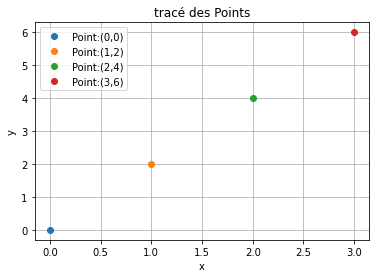

In [63]:
Xpts=[0,1,2,3]
Ypts=[0,2,4,6]
for i in range(len(Xpts)) :
    Point(Xpts[i],Ypts[i]).plot()

## FIN